In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df = pd.read_csv('train_LZdllcl.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Data info and description 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


## Null value Analysis

In [6]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [8]:
df.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [9]:
dept_count = pd.DataFrame(df.department.value_counts())
# dept_count

In [10]:
for i in dept_count.index:
    print(i)
    print(df.loc[df.department == i].education.value_counts())
    print('\n')

Sales & Marketing
Bachelor's          11099
Master's & above     4166
Name: education, dtype: int64


Operations
Bachelor's          7781
Master's & above    3165
Below Secondary      176
Name: education, dtype: int64


Technology
Bachelor's          4642
Master's & above    2196
Below Secondary      201
Name: education, dtype: int64


Procurement
Bachelor's          4393
Master's & above    2544
Below Secondary      129
Name: education, dtype: int64


Analytics
Bachelor's          3978
Master's & above    1037
Name: education, dtype: int64


Finance
Bachelor's          1895
Master's & above     499
Below Secondary      106
Name: education, dtype: int64


HR
Bachelor's          1525
Master's & above     733
Below Secondary      128
Name: education, dtype: int64


Legal
Bachelor's          814
Master's & above    156
Below Secondary      65
Name: education, dtype: int64


R&D
Bachelor's          542
Master's & above    429
Name: education, dtype: int64




## Imputing the Null values

In [11]:
# df.loc[df.education.isnull()].department.value_counts()

In [12]:
df.education.fillna("Bachelor's",axis=0,inplace=True)

In [13]:
# df[df['previous_year_rating'].isnull()]

In [14]:
df.previous_year_rating.fillna(0,axis=0,inplace=True)

## Analysis 

In [15]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [16]:
# Adding new feature "Age Category"
ac = []
for i in df.age:
    if 20 <= i < 30:
        ac.append('20 - 29 years')
    elif 30<= i < 40:
        ac.append('30 - 39 years')
    elif 40<= i < 50:
        ac.append('40 - 49 years')
    elif 50<= i <= 60:
        ac.append('50 - 60 years')
df['age_category'] = ac

In [17]:
# Adding new feature "los category"
los = []
for i in df.length_of_service:
    if 1<=i<3:
        los.append('1 - 2 years')
    elif 3<= i < 6:
        los.append('3 - 5 years')
    elif 6<= i < 11:
        los.append('6 - 10 years')
    elif 11<= i < 21:
        los.append('11 to 20 years')
    elif 21 <= i < 31:
        los.append('21 - 30 years')
    elif i > 30:
        los.append('> than 30 years')
df['los_category'] = los

In [18]:
## previous year rating wrt gender
df.previous_year_rating.groupby(df.gender).mean().sort_values(ascending=False)

# inference : Female employees have slightly better than male

gender
f    3.136341
m    3.054343
Name: previous_year_rating, dtype: float64

In [19]:
## previous year rating wrt region 
df.previous_year_rating.groupby(df.region).mean().sort_values(ascending=False).head(10) # top 10 regions
# df.previous_year_rating.groupby(df.region).mean().sort_values(ascending=False) # full list

region
region_4     3.406929
region_3     3.355491
region_17    3.257538
region_19    3.257437
region_23    3.238298
region_7     3.224241
region_28    3.205615
region_15    3.204416
region_25    3.195360
region_13    3.172205
Name: previous_year_rating, dtype: float64

In [20]:
## previous year rating wrt education
df.previous_year_rating.groupby(df.education).mean().sort_values(ascending=False)

education
Master's & above    3.333936
Bachelor's          3.003762
Below Secondary     1.987578
Name: previous_year_rating, dtype: float64

In [21]:
## previous year rating wrt department
df.previous_year_rating.groupby(df.department).mean().sort_values(ascending=False)

department
Operations           3.443955
R&D                  3.253253
Analytics            3.247571
HR                   3.128619
Finance              3.115142
Procurement          3.100588
Technology           2.917064
Legal                2.854668
Sales & Marketing    2.829097
Name: previous_year_rating, dtype: float64

In [22]:
## previous year rating wrt recruitment_channel
df.previous_year_rating.groupby(df.recruitment_channel).mean().sort_values(ascending=False)

recruitment_channel
referred    3.550788
sourcing    3.073213
other       3.065263
Name: previous_year_rating, dtype: float64

In [23]:
## previous year rating wrt no_of_trainings
df.previous_year_rating.groupby(df.no_of_trainings).mean().sort_values(ascending=False)
# Inference : People who went through more than 3 trainings
#             have not gotten good ratings the next year.

no_of_trainings
1     3.117581
2     2.969576
3     2.814752
7     2.666667
10    2.600000
4     2.551282
5     2.531250
8     2.200000
6     2.022727
9     1.600000
Name: previous_year_rating, dtype: float64

In [24]:
## previous year rating wrt age_category
df.previous_year_rating.groupby(df.age_category).mean().sort_values(ascending=False)

## previous year rating wrt age
# df.previous_year_rating.groupby(df.age).mean().sort_values(ascending=False)

age_category
40 - 49 years    3.323615
50 - 60 years    3.302401
30 - 39 years    3.282269
20 - 29 years    2.480177
Name: previous_year_rating, dtype: float64

In [25]:
## previous year rating wrt length of service category
df.previous_year_rating.groupby(df.los_category).mean().sort_values(ascending=False)

# inferences : Experienced candidates have performed better
#               than the candidates with less experience

## previous year rating wrt length of service
# df.previous_year_rating.groupby(df.length_of_service).mean().sort_values(ascending=False)

los_category
> than 30 years    3.613636
6 - 10 years       3.341801
3 - 5 years        3.328054
11 to 20 years     3.313711
21 - 30 years      3.293249
1 - 2 years        2.096608
Name: previous_year_rating, dtype: float64

In [26]:
## previous year rating wrt KPI met 
df.previous_year_rating.groupby(df['KPIs_met >80%']).mean().sort_values(ascending=False)
# Inference : candidates who have achived KPI's > 80 have better ratings than others

KPIs_met >80%
1    3.636307
0    2.775910
Name: previous_year_rating, dtype: float64

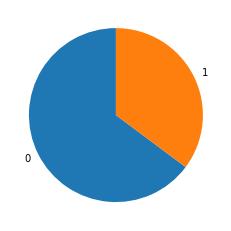

In [27]:
## count of how many have achieved the KPI's > 80%
plt.pie(df['KPIs_met >80%'].value_counts(),labels=df['KPIs_met >80%'].value_counts().index,startangle=90)
plt.show()

In [28]:
## previous year rating wrt awards won
df.previous_year_rating.groupby(df['awards_won?']).mean().sort_values(ascending=False)

## Inference : employees who hav not won awards have also equally performed well.

awards_won?
1    3.287402
0    3.073798
Name: previous_year_rating, dtype: float64

In [29]:
## previous year rating wrt promotion
df.previous_year_rating.groupby(df['is_promoted']).mean().sort_values(ascending=False)

# Inference : people who got promoted also had better ratings than emps who did not
#             get promoted

is_promoted
1    3.696658
0    3.021221
Name: previous_year_rating, dtype: float64

## Data preprocessing for ML

In [30]:
ml = df.copy()

In [31]:
ml2 = ml.copy()

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve

In [33]:
dept = []
for i in ml2.department:
    if i == 'Sales & Marketing':
        dept.append(1)
    elif i == 'Operations':
        dept.append(2)
    elif i == 'Technology':
        dept.append(3)
    elif i == 'Analytics':
        dept.append(4)
    elif i == 'R&D':
        dept.append(5)
    elif i == 'Procurement':
        dept.append(6)
    elif i == 'Finance':
        dept.append(7)
    elif i == 'HR':
        dept.append(8)
    elif i == 'Legal':
        dept.append(9)
        
ml2['department'] = dept

In [34]:
# ml2['region'] = le.fit_transform(ml2['region']) #Too many values to loop, so label_encoding 

In [35]:
## code to Lable encode and reverse it ! ## refer the code snippet file

# encoders = {}
# for x in ml2.columns:
#     if ml2[x].dtypes=='object':
#         le = LabelEncoder()
#         ml2[x]=le.fit_transform(ml2[x].astype(str))
#         encoders[x] = le

# for x, le in encoders.items():
#     ml2[x] = le.inverse_transform(ml2[x])

In [36]:
edu = []
for i in ml2.education:
    if i == "Bachelor's":
        edu.append(2)
    elif i == "Master's & above":
        edu.append(1)
    elif i == "Below Secondary":
        edu.append(3)
ml2['education'] = edu

In [37]:
gen = []
for i in ml2.gender:
    if i == 'f':
        gen.append(1)
    elif i == 'm':
        gen.append(2)
ml2['gender'] = gen

In [38]:
rc = []
for i in ml2.recruitment_channel:
    if i == 'other':
        rc.append(1)
    elif i == 'sourcing':
        rc.append(2)
    elif i == 'referred':
        rc.append(3)
ml2['recruitment_channel'] = rc

In [39]:
## AGE CATEGORY (IF NEEDED)
# ac = []
# for i in ml2.age_category:
#     if i == '30 - 39 years':
#         ac.append(1)
#     elif i == '20 - 29 years':
#         ac.append(2)
#     elif i == '40 - 49 years':
#         ac.append(3)
#     elif i == '50 - 60 years':
#         ac.append(4)
# ml2['age_category'] = ac

In [40]:
## dropping age_category and los_category
ml2.drop(['region','employee_id','age_category','los_category'],axis=1,inplace=True)

In [41]:
ml2.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,1,1,2,1,35,5.0,8,1,0,49,0
1,2,2,2,1,1,30,5.0,4,0,0,60,0
2,1,2,2,2,1,34,3.0,7,0,0,50,0
3,1,2,2,1,2,39,1.0,10,0,0,50,0
4,3,2,2,1,1,45,3.0,2,0,0,73,0


In [42]:
# ml2.info()

0    50140
1     4668
Name: is_promoted, dtype: int64


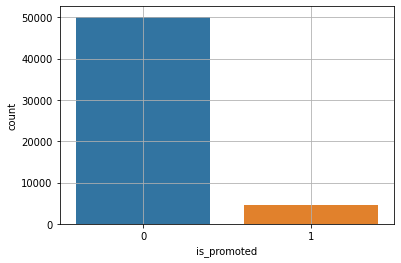

In [43]:
sns.countplot(ml2.is_promoted)
plt.grid()
print(ml2.is_promoted.value_counts())
plt.show()

## ML Models

In [44]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
gnb = GaussianNB()
svc = SVC(probability=True)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
adb = AdaBoostClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier(verbose=False)

In [45]:
x = ml2.drop('is_promoted',axis=1)
y = ml2.is_promoted

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15, random_state=43)

### Logistics Regression

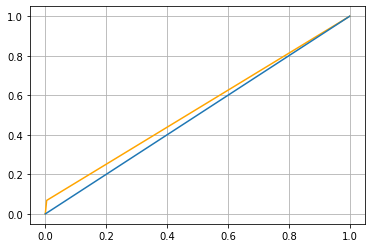

Accuracy : 0.9167131756321641

Classification report :

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42626
           1       0.59      0.07      0.12      3960

    accuracy                           0.92     46586
   macro avg       0.75      0.53      0.54     46586
weighted avg       0.89      0.92      0.89     46586



 ------------------------------------------------------------------------------------------ 




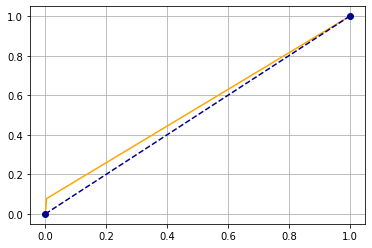

Accuracy : 0.9165653125760156

Classification report :

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7514
           1       0.62      0.08      0.14       708

    accuracy                           0.92      8222
   macro avg       0.77      0.54      0.55      8222
weighted avg       0.89      0.92      0.89      8222



In [47]:
lr.fit(xtrain,ytrain)
lr_train_pred = lr.predict(xtrain)
lr_train_pp = lr.predict_proba(xtrain)
lr_train_pp = lr_train_pp[:,1]
lr_train_acc = accuracy_score(ytrain,lr_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, lr_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',lr_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,lr_train_pred))
print('\n\n','--'*45,'\n\n')
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_pp = lr.predict_proba(xtest)
lr_test_pp = lr_test_pp[:,1]
lr_test_acc = accuracy_score(ytest,lr_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, lr_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',lr_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,lr_test_pred))

### KNN

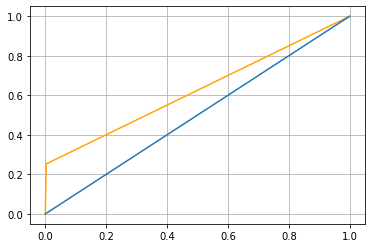

Accuracy : 0.9336925256514833

Classification report :

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     42626
           1       0.88      0.25      0.39      3960

    accuracy                           0.93     46586
   macro avg       0.91      0.62      0.68     46586
weighted avg       0.93      0.93      0.92     46586



 ------------------------------------------------------------------------------------------ 




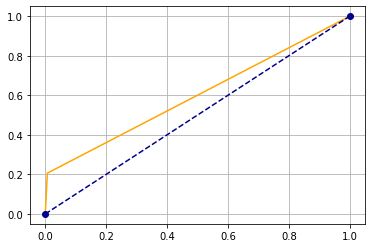

Accuracy : 0.9255655558258331

Classification report :

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7514
           1       0.74      0.21      0.32       708

    accuracy                           0.93      8222
   macro avg       0.84      0.60      0.64      8222
weighted avg       0.91      0.93      0.91      8222



In [48]:
kn.fit(xtrain,ytrain)
kn_train_pred = kn.predict(xtrain)
kn_train_pp = kn.predict_proba(xtrain)
kn_train_pp = kn_train_pp[:,1]
kn_train_acc = accuracy_score(ytrain,kn_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, kn_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',kn_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,kn_train_pred))
print('\n\n','--'*45,'\n\n')
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_pp = kn.predict_proba(xtest)
kn_test_pp = kn_test_pp[:,1]
kn_test_acc = accuracy_score(ytest,kn_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, kn_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',kn_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,kn_test_pred))

### Gausian Naive bayse

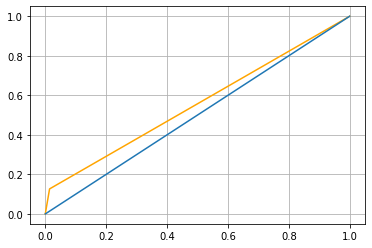

Accuracy : 0.9128922852359078

Classification report :

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     42626
           1       0.46      0.13      0.20      3960

    accuracy                           0.91     46586
   macro avg       0.69      0.56      0.58     46586
weighted avg       0.88      0.91      0.89     46586



 ------------------------------------------------------------------------------------------ 




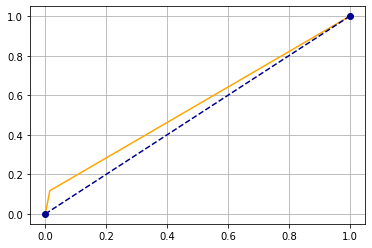

Accuracy : 0.9103624422281683

Classification report :

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7514
           1       0.43      0.12      0.18       708

    accuracy                           0.91      8222
   macro avg       0.67      0.55      0.57      8222
weighted avg       0.88      0.91      0.89      8222



In [49]:
gnb.fit(xtrain,ytrain)
gnb_train_pred = gnb.predict(xtrain)
gnb_train_pp = gnb.predict_proba(xtrain)
gnb_train_pp = gnb_train_pp[:,1]
gnb_train_acc = accuracy_score(ytrain,gnb_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, gnb_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',gnb_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,gnb_train_pred))
print('\n\n','--'*45,'\n\n')
gnb.fit(xtrain,ytrain)
gnb_test_pred = gnb.predict(xtest)
gnb_test_pp = gnb.predict_proba(xtest)
gnb_test_pp = gnb_test_pp[:,1]
gnb_test_acc = accuracy_score(ytest,gnb_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, gnb_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',gnb_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,gnb_test_pred))

### SVM Classifier

In [50]:
# svc.fit(xtrain,ytrain)
# svc_train_pred = svc.predict(xtrain)
# svc_train_pp = svc.predict_proba(xtrain)
# svc_train_pp = svc_train_pp[:,1]
# svc_train_acc = accuracy_score(ytrain,svc_train_pred)
# fpr, tpr, thresholds = roc_curve(ytrain, svc_train_pred)
# plt.plot(fpr, tpr, color='orange', label='ROC')
# plt.plot([0,1])
# plt.grid()
# plt.show()
# print('Accuracy :',svc_train_acc)
# print('\nClassification report :\n')
# print(classification_report(ytrain,svc_train_pred))

# print('\n\n','--'*45,'\n\n')

# svc.fit(xtrain,ytrain)
# svc_test_pred = svc.predict(xtest)
# svc_test_pp = svc.predict_proba(xtest)
# svc_test_pp = svc_test_pp[:,1]
# svc_test_acc = accuracy_score(ytest,svc_test_pred)
# fpr, tpr, thresholds = roc_curve(ytest, svc_test_pred)
# plt.plot(fpr, tpr, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
# plt.grid()
# plt.show()
# print('Accuracy :',svc_test_acc)
# print('\nClassification report :\n')
# print(classification_report(ytest,svc_test_pred))

### Decision Tree

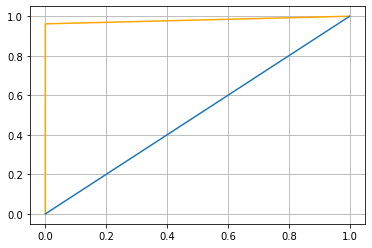

Accuracy : 0.9966513544841797

Classification report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42626
           1       1.00      0.96      0.98      3960

    accuracy                           1.00     46586
   macro avg       1.00      0.98      0.99     46586
weighted avg       1.00      1.00      1.00     46586



 ------------------------------------------------------------------------------------------ 




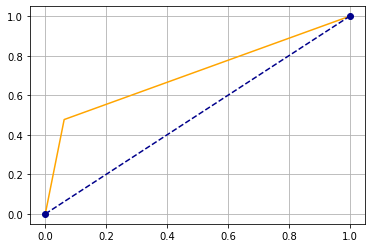

Accuracy : 0.8983215762588178

Classification report :

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7514
           1       0.42      0.48      0.45       708

    accuracy                           0.90      8222
   macro avg       0.69      0.71      0.70      8222
weighted avg       0.90      0.90      0.90      8222



In [51]:
dt.fit(xtrain,ytrain)
dt_train_pred = dt.predict(xtrain)
dt_train_pp = dt.predict_proba(xtrain)
dt_train_pp = dt_train_pp[:,1]
dt_train_acc = accuracy_score(ytrain,dt_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, dt_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',dt_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,dt_train_pred))
print('\n\n','--'*45,'\n\n')
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_pp = dt.predict_proba(xtest)
dt_test_pp = dt_test_pp[:,1]
dt_test_acc = accuracy_score(ytest,dt_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, dt_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',dt_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,dt_test_pred))

### Random Forest

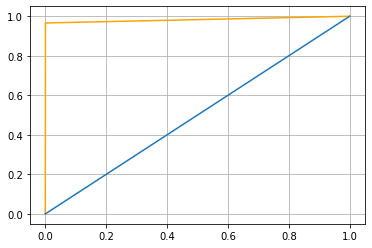

Accuracy : 0.9966084231314128

Classification report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42626
           1       0.99      0.97      0.98      3960

    accuracy                           1.00     46586
   macro avg       1.00      0.98      0.99     46586
weighted avg       1.00      1.00      1.00     46586



 ------------------------------------------------------------------------------------------ 




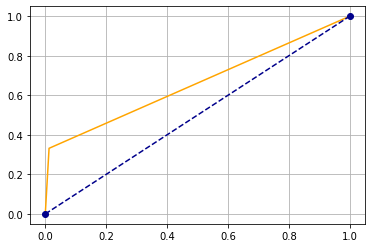

Accuracy : 0.9311603016297738

Classification report :

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7514
           1       0.72      0.33      0.45       708

    accuracy                           0.93      8222
   macro avg       0.83      0.66      0.71      8222
weighted avg       0.92      0.93      0.92      8222



In [52]:
rf.fit(xtrain,ytrain)
rf_train_pred = rf.predict(xtrain)
rf_train_pp = rf.predict_proba(xtrain)
rf_train_pp = rf_train_pp[:,1]
rf_train_acc = accuracy_score(ytrain,rf_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, rf_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',rf_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,rf_train_pred))
print('\n\n','--'*45,'\n\n')
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_pp = rf.predict_proba(xtest)
rf_test_pp = rf_test_pp[:,1]
rf_test_acc = accuracy_score(ytest,rf_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, rf_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',rf_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,rf_test_pred))

### XGB

[11:17:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


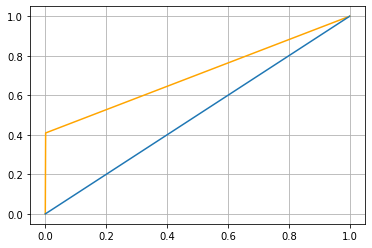

Accuracy : 0.9487614304726741

Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42626
           1       0.97      0.41      0.58      3960

    accuracy                           0.95     46586
   macro avg       0.96      0.70      0.77     46586
weighted avg       0.95      0.95      0.94     46586



 ------------------------------------------------------------------------------------------ 


[11:17:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


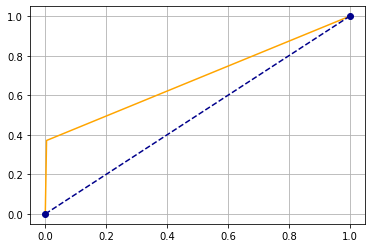

Accuracy : 0.9421065434200925

Classification report :

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7514
           1       0.89      0.37      0.52       708

    accuracy                           0.94      8222
   macro avg       0.92      0.68      0.75      8222
weighted avg       0.94      0.94      0.93      8222



In [53]:
xgb.fit(xtrain,ytrain)
xgb_train_pred = xgb.predict(xtrain)
xgb_train_pp = xgb.predict_proba(xtrain)
xgb_train_pp = xgb_train_pp[:,1]
xgb_train_acc = accuracy_score(ytrain,xgb_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, xgb_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',xgb_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,xgb_train_pred))
print('\n\n','--'*45,'\n\n')
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_pp = xgb.predict_proba(xtest)
xgb_test_pp = xgb_test_pp[:,1]
xgb_test_acc = accuracy_score(ytest,xgb_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, xgb_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',xgb_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,xgb_test_pred))

### XGBRF

[11:17:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


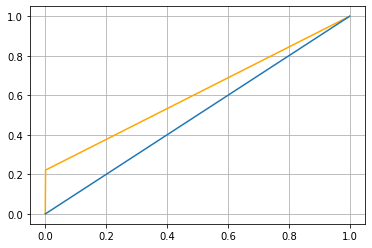

Accuracy : 0.9330056240072124

Classification report :

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     42626
           1       0.96      0.22      0.36      3960

    accuracy                           0.93     46586
   macro avg       0.94      0.61      0.66     46586
weighted avg       0.93      0.93      0.91     46586



 ------------------------------------------------------------------------------------------ 


[11:17:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


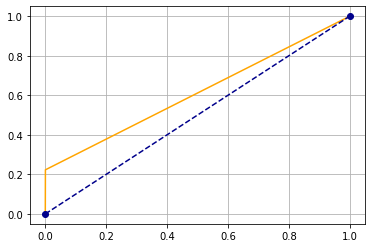

Accuracy : 0.9327414254439309

Classification report :

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7514
           1       0.98      0.22      0.36       708

    accuracy                           0.93      8222
   macro avg       0.96      0.61      0.66      8222
weighted avg       0.94      0.93      0.91      8222



In [54]:
xgbrf.fit(xtrain,ytrain)
xgbrf_train_pred = xgbrf.predict(xtrain)
xgbrf_train_pp = xgbrf.predict_proba(xtrain)
xgbrf_train_pp = xgbrf_train_pp[:,1]
xgbrf_train_acc = accuracy_score(ytrain,xgbrf_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, xgbrf_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',xgbrf_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,xgbrf_train_pred))
print('\n\n','--'*45,'\n\n')
xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_pp = xgbrf.predict_proba(xtest)
xgbrf_test_pp = xgbrf_test_pp[:,1]
xgbrf_test_acc = accuracy_score(ytest,xgbrf_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, xgbrf_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',xgbrf_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,xgbrf_test_pred))

### Catboosting

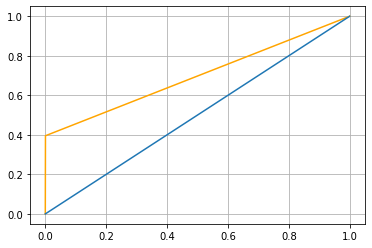

Accuracy : 0.9480745288284034

Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42626
           1       0.98      0.40      0.56      3960

    accuracy                           0.95     46586
   macro avg       0.97      0.70      0.77     46586
weighted avg       0.95      0.95      0.94     46586



 ------------------------------------------------------------------------------------------ 




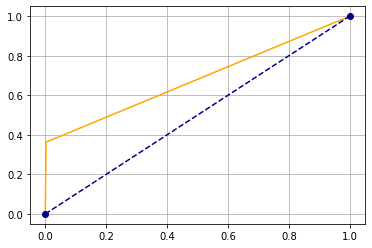

Accuracy : 0.9428362928727804

Classification report :

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7514
           1       0.93      0.36      0.52       708

    accuracy                           0.94      8222
   macro avg       0.94      0.68      0.75      8222
weighted avg       0.94      0.94      0.93      8222



In [55]:
cat.fit(xtrain,ytrain)
cat_train_pred = cat.predict(xtrain)
cat_train_pp = cat.predict_proba(xtrain)
cat_train_pp = cat_train_pp[:,1]
cat_train_acc = accuracy_score(ytrain,cat_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, cat_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',cat_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,cat_train_pred))
print('\n\n','--'*45,'\n\n')
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_pp = cat.predict_proba(xtest)
cat_test_pp = cat_test_pp[:,1]
cat_test_acc = accuracy_score(ytest,cat_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, cat_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',cat_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,cat_test_pred))

### Light GBM

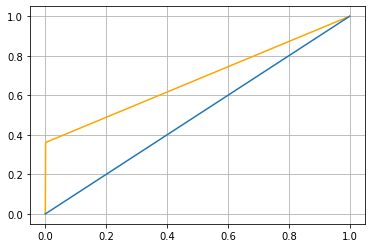

Accuracy : 0.9447473489889666

Classification report :

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42626
           1       0.97      0.36      0.53      3960

    accuracy                           0.94     46586
   macro avg       0.96      0.68      0.75     46586
weighted avg       0.95      0.94      0.93     46586



 ------------------------------------------------------------------------------------------ 




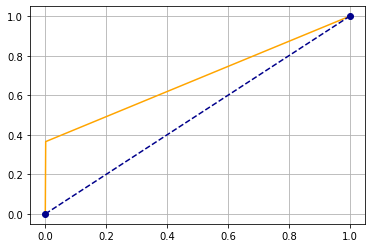

Accuracy : 0.9441741668693748

Classification report :

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7514
           1       0.96      0.37      0.53       708

    accuracy                           0.94      8222
   macro avg       0.95      0.68      0.75      8222
weighted avg       0.95      0.94      0.93      8222



In [56]:
lgb.fit(xtrain,ytrain)
lgb_train_pred = lgb.predict(xtrain)
lgb_train_pp = lgb.predict_proba(xtrain)
lgb_train_pp = lgb_train_pp[:,1]
lgb_train_acc = accuracy_score(ytrain,lgb_train_pred)
fpr, tpr, thresholds = roc_curve(ytrain, lgb_train_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1])
plt.grid()
plt.show()
print('Accuracy :',lgb_train_acc)
print('\nClassification report :\n')
print(classification_report(ytrain,lgb_train_pred))
print('\n\n','--'*45,'\n\n')
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_pp = lgb.predict_proba(xtest)
lgb_test_pp = lgb_test_pp[:,1]
lgb_test_acc = accuracy_score(ytest,lgb_test_pred)
fpr, tpr, thresholds = roc_curve(ytest, lgb_test_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',marker='o')
plt.grid()
plt.show()
print('Accuracy :',lgb_test_acc)
print('\nClassification report :\n')
print(classification_report(ytest,lgb_test_pred))

In [59]:
lr_test_pp = lr_test_pp.tolist()
kn_test_pp = kn_test_pp.tolist()
gnb_test_pp = gnb_test_pp.tolist()
dt_test_pp = dt_test_pp.tolist()
rf_test_pp = rf_test_pp.tolist()
xgb_test_pp = xgb_test_pp.tolist()
xgbrf_test_pp = xgbrf_test_pp.tolist()
cat_test_pp = cat_test_pp.tolist()
lgb_test_pp = lgb_test_pp.tolist()

In [60]:
mean_probas = pd.DataFrame({'lr_test_pp':lr_test_pp , 'kn_test_pp':kn_test_pp , 'gnb_test_pp':gnb_test_pp,'dt_test_pp':dt_test_pp,
             'rf_test_pp':rf_test_pp,'xgb_test_pp':xgb_test_pp,'xgbrf_test_pp':xgbrf_test_pp,'cat_test_pp':cat_test_pp,
             'lgb_test_pp':lgb_test_pp})

In [61]:
mean_probas.head()

,lr_test_pp,kn_test_pp,gnb_test_pp,dt_test_pp,rf_test_pp,xgb_test_pp,xgbrf_test_pp,cat_test_pp,lgb_test_pp
0,0.212094,0.4,0.083852,0.0,0.18,0.214577,0.204307,0.232207,0.227824
1,0.041922,0.0,0.054198,0.0,0.05,0.032700,0.133241,0.020500,0.033187
2,0.091065,0.0,0.042881,0.0,0.00,0.017563,0.132936,0.020344,0.021244
3,0.014569,0.0,0.002120,0.0,0.00,0.000015,0.120536,0.000003,0.000235
4,0.082890,0.0,0.037944,0.0,0.19,0.338605,0.191357,0.243513,0.181416


In [62]:
# (0.212094+0.4+0.083852+0+0.23+0.214577+0.204307+0.232207+0.227824)/9

In [63]:
mp = []
for i in mean_probas.index:
    mp.append(mean_probas.iloc[i].mean())


### Choose if you want a single model's proba or the mean proba 

In [64]:
mean_probas['mean_proba'] = mp ## MEAN PROBA

In [65]:
# mean_probas['mean_proba'] = lgb_test_pp ## SINGLE MODEL PROBA

In [66]:
fpr,tpr,threshold = roc_curve(ytest,mean_probas['mean_proba'])

In [67]:
final_probas = mean_probas['mean_proba']

In [68]:
print('\nlen of dataframe : ',len(pd.DataFrame({'threshold':threshold , 'fpr':fpr, 'tpr':tpr})))
pd.DataFrame({'threshold':threshold , 'fpr':fpr, 'tpr':tpr}).head(10)


len of dataframe :  959


,threshold,fpr,tpr
0,1.973796,0.000000,0.000000
1,0.973796,0.000000,0.001412
2,0.609055,0.000000,0.233051
3,0.607780,0.000133,0.233051
4,0.574953,0.000133,0.266949
5,0.574497,0.000266,0.266949
6,0.572164,0.000266,0.269774
7,0.572070,0.000399,0.269774
8,0.556426,0.000399,0.295198
9,0.550765,0.000665,0.295198


In [71]:
# final_probas

In [70]:
acc=[]
for i in threshold:
    ypred = np.where(final_probas>i,1,0)
    acc.append(f1_score(ytest,ypred))
    
decider = pd.concat([pd.Series(threshold),pd.Series(acc)],axis=1)
decider.rename(columns = {0: 'Threshold', 1: 'Accuracies'}, inplace = True)
decider.sort_values('Accuracies',ascending=False)


,Threshold,Accuracies
50,0.391228,0.526725
51,0.385416,0.526112
52,0.384527,0.525604
59,0.367229,0.523719
39,0.425033,0.523571
...,...,...
956,0.014348,0.159747
957,0.014342,0.159729
958,0.013662,0.158584
1,0.973796,0.000000


In [72]:
fins = []
for i in mean_probas.mean_proba:
    if i > 0.391228:
        fins.append(1)
    else:
        fins.append(0)
mean_probas['predictions'] = fins


In [73]:
mean_probas.head()

,lr_test_pp,kn_test_pp,gnb_test_pp,dt_test_pp,rf_test_pp,xgb_test_pp,xgbrf_test_pp,cat_test_pp,lgb_test_pp,mean_proba,predictions
0,0.212094,0.4,0.083852,0.0,0.18,0.214577,0.204307,0.232207,0.227824,0.194984,0
1,0.041922,0.0,0.054198,0.0,0.05,0.032700,0.133241,0.020500,0.033187,0.040639,0
2,0.091065,0.0,0.042881,0.0,0.00,0.017563,0.132936,0.020344,0.021244,0.036226,0
3,0.014569,0.0,0.002120,0.0,0.00,0.000015,0.120536,0.000003,0.000235,0.015275,0
4,0.082890,0.0,0.037944,0.0,0.19,0.338605,0.191357,0.243513,0.181416,0.140636,0


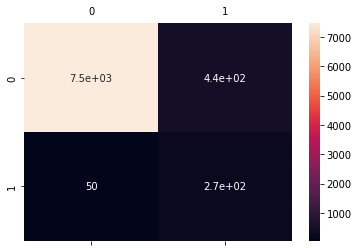

[[7464  437]
 [  50  271]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      7514
           1       0.84      0.38      0.53       708

    accuracy                           0.94      8222
   macro avg       0.89      0.69      0.75      8222
weighted avg       0.94      0.94      0.93      8222

ROC AUC Score : 0.6880570580866752


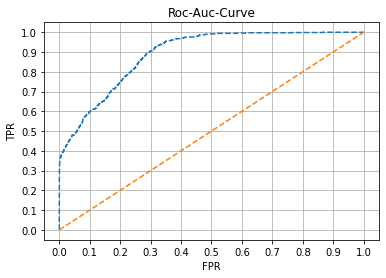

In [74]:


mean_cm = confusion_matrix(ytest,fins)
# print(mean_cm.transpose())
print('\n')
# print(mean_cm)
# print('\n')
sns.heatmap(mean_cm.transpose(),annot=True)
plt.tick_params(labeltop=True,labelbottom=False)

plt.show()
print(confusion_matrix(ytest,fins).transpose())
print(classification_report(ytest,fins))
plt.plot(fpr,tpr,linestyle='--')
plt.plot([0,1],[0,1],linestyle='--')
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Roc-Auc-Curve')
plt.grid()
print('ROC AUC Score :',roc_auc_score(ytest,fins))
plt.show()



In [75]:
final_threshold = threshold[50]

In [76]:
final_threshold

0.3912278925365656

### Test data

In [77]:
test = pd.read_csv('test_2umaH9m.csv')

In [78]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [80]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,23490.0,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
no_of_trainings,23490.0,1.254236,0.600910,1.0,1.00,1.0,1.0,9.0
age,23490.0,34.782929,7.679492,20.0,29.00,33.0,39.0,60.0
previous_year_rating,21678.0,3.339146,1.263294,1.0,3.00,3.0,4.0,5.0
length_of_service,23490.0,5.810387,4.207917,1.0,3.00,5.0,7.0,34.0
KPIs_met >80%,23490.0,0.358834,0.479668,0.0,0.00,0.0,1.0,1.0
awards_won?,23490.0,0.022776,0.149191,0.0,0.00,0.0,0.0,1.0
avg_training_score,23490.0,63.263133,13.411750,39.0,51.00,60.0,76.0,99.0


### Imputing Nulls

In [81]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [82]:
test.education.fillna("Bachelor's",axis=0,inplace=True)

In [83]:
test.previous_year_rating.fillna(0,axis=0,inplace=True)

In [84]:
eid = test.employee_id.tolist()

In [ ]:
test.drop('employee_id',axis=1,inplace=True)
test.drop('region',axis=1,inplace=True)

In [89]:
dept = []
for i in test.department:
    if i == 'Sales & Marketing':
        dept.append(1)
    elif i == 'Operations':
        dept.append(2)
    elif i == 'Technology':
        dept.append(3)
    elif i == 'Analytics':
        dept.append(4)
    elif i == 'R&D':
        dept.append(5)
    elif i == 'Procurement':
        dept.append(6)
    elif i == 'Finance':
        dept.append(7)
    elif i == 'HR':
        dept.append(8)
    elif i == 'Legal':
        dept.append(9)
        
test['department'] = dept

In [90]:
edu = []
for i in test.education:
    if i == "Bachelor's":
        edu.append(2)
    elif i == "Master's & above":
        edu.append(1)
    elif i == "Below Secondary":
        edu.append(3)
test['education'] = edu

In [91]:
gen = []
for i in test.gender:
    if i == 'f':
        gen.append(1)
    elif i == 'm':
        gen.append(2)
test['gender'] = gen

In [92]:
rc = []
for i in test.recruitment_channel:
    if i == 'other':
        rc.append(1)
    elif i == 'sourcing':
        rc.append(2)
    elif i == 'referred':
        rc.append(3)
test['recruitment_channel'] = rc

In [93]:
test.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,3,2,2,2,1,24,0.0,1,1,0,77
1,8,2,1,1,1,31,3.0,5,0,0,51
2,1,2,2,1,1,31,1.0,4,0,0,47
3,6,2,1,1,3,31,2.0,9,0,0,65
4,7,2,2,2,1,30,4.0,7,0,0,61


In [94]:
x_train = ml2.drop('is_promoted',axis=1)
y_train = ml2.is_promoted

In [95]:
x_test = test

In [97]:
lgb.fit(x_train,y_train)
lgb_final_pred = lgb.predict(x_test)
lgb_final_pp = lgb.predict_proba(x_test)
lgb_final_pp = lgb_final_pp[:,1]

In [98]:
cat.fit(x_train,y_train)
cat_final_pred = cat.predict(x_test)
cat_final_pp = cat.predict_proba(x_test)
cat_final_pp = cat_final_pp[:,1]

In [99]:
lr.fit(x_train,y_train)
lr_final_pred = lr.predict(x_test)
lr_final_pp = lr.predict_proba(x_test)
lr_final_pp = lr_final_pp[:,1]

In [100]:
kn.fit(x_train,y_train)
kn_final_pred = kn.predict(x_test)
kn_final_pp = kn.predict_proba(x_test)
kn_final_pp = kn_final_pp[:,1]

In [101]:
gnb.fit(x_train,y_train)
gnb_final_pred = gnb.predict(x_test)
gnb_final_pp = gnb.predict_proba(x_test)
gnb_final_pp = gnb_final_pp[:,1]

In [102]:
dt.fit(x_train,y_train)
dt_final_pred = dt.predict(x_test)
dt_final_pp = dt.predict_proba(x_test)
dt_final_pp = dt_final_pp[:,1]

In [103]:
rf.fit(x_train,y_train)
rf_final_pred = rf.predict(x_test)
rf_final_pp = rf.predict_proba(x_test)
rf_final_pp = rf_final_pp[:,1]

In [104]:
xgb.fit(x_train,y_train)
xgb_final_pred = xgb.predict(x_test)
xgb_final_pp = xgb.predict_proba(x_test)
xgb_final_pp = xgb_final_pp[:,1]

[14:28:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [105]:
xgbrf.fit(x_train,y_train)
xgbrf_final_pred = xgbrf.predict(x_test)
xgbrf_final_pp = xgbrf.predict_proba(x_test)
xgbrf_final_pp = xgbrf_final_pp[:,1]

[14:28:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [107]:
lgb_final_pp = lgb_final_pp.tolist()
cat_final_pp = cat_final_pp.tolist()
lr_final_pp = lr_final_pp.tolist()
kn_final_pp = kn_final_pp.tolist()
gnb_final_pp = gnb_final_pp.tolist()
dt_final_pp = dt_final_pp.tolist()
rf_final_pp = rf_final_pp.tolist()
xgb_final_pp = xgb_final_pp.tolist()
xgbrf_final_pp = xgbrf_final_pp.tolist()

In [ ]:
final_probas = pd.DataFrame({''})

In [167]:
prediction = lgb.predict(x_test)
pred_proba = lgb.predict_proba(x_test)
pred_proba = pred_proba[:,1]

In [168]:
final_threshold

0.3957766697092082

In [175]:
results = []
for i in pred_proba:
    if i > final_threshold:
        results.append(1)
    else:
        results.append(0)


In [176]:
final = pd.DataFrame({'employee_id':eid , 'is_promoted':results})

In [177]:
final.to_csv('submission_03_lgb_roc_auc_threshold.csv',index=False)